In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import AA as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
Source = '/Users/johnvirgin/OneDrive - University of Waterloo/Papers/GMD_CanESM/'

In [11]:
#load in cloud feedbacks and dimensions as needed
data_sw = {}
data_lw = {}

mods = ['CanESM2','CanESM5_p2']
props = ['Standard', 'Amount', 'Altitude', 'Optical Depth', 'Residual', 'Sum']

for i in range(2):
    data_sw[mods[i]] = {}
    data_lw[mods[i]] = {}
    for j in range(len(props)):
        data_sw[mods[i]][props[j]] = pk.load(open(Source+\
    'Data/'+mods[i]+'/CFMIP/Tier 1/'+mods[i]+'_CFMIP_TrCLsw_FB_MZdecomp_Grid.pi','rb'))[props[j]]
        data_lw[mods[i]][props[j]] = pk.load(open(Source+\
    'Data/'+mods[i]+'/CFMIP/Tier 1/'+mods[i]+'_CFMIP_TrCLlw_FB_MZdecomp_Grid.pi','rb'))[props[j]]


dSST = {}
for i in range(len(mods)):
    dSST[mods[i]] = pk.load(open(\
    Source+'Data/'+mods[i]+'/CFMIP/Tier 1/'+mods[i]+'_dSST.pi','rb'))
    
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [14]:
land_mask = np.isnan(np.mean(pk.load(\
    open(Source+'Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))
land_valid = np.isfinite(np.mean(pk.load(\
    open(Source+'Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))

SST_plot = dict()
SST_gam = dict()
for mod in dSST.keys():
    SST_plot[mod] = {}
    SST_gam[mod] = {}
    for exp in dSST[mod].keys():
        SST_plot[mod][exp] = np.nanmean(dSST[mod][exp],axis=0)
        SST_gam[mod][exp] = np.average(SST_plot[mod][exp][land_valid],weights=coslat[land_valid])
        SST_plot[mod][exp] = np.concatenate((SST_plot[mod][exp][:,64:],SST_plot[mod][exp][:,0:64]),axis=1)
        SST_plot[mod][exp],lon_cyc = add_cyclic_point(SST_plot[mod][exp],lon)

In [18]:
data_sw_plot = dict()
data_lw_plot = dict()
data_lw_gam = dict()
data_sw_gam = dict()
for mods in data_sw.keys():
    data_sw_plot[mods] = dict()
    data_lw_plot[mods] = dict()
    
    data_sw_gam[mods] = dict()
    data_lw_gam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_plot[mods][prop] = dict()
        data_lw_plot[mods][prop] = dict()
        
        data_sw_gam[mods][prop] = dict()
        data_lw_gam[mods][prop] = dict()
        
        for exp in data_sw[mods][prop].keys():
            data_sw_plot[mods][prop][exp] = dict()
            data_lw_plot[mods][prop][exp] = dict()
        
            data_sw_gam[mods][prop][exp] = dict()
            data_lw_gam[mods][prop][exp] = dict()
            
            for ctp in data_sw[mods][prop][exp].keys():
                data_sw_gam[mods][prop][exp][ctp] = np.average(np.nanmean(\
                    data_sw[mods][prop][exp][ctp],axis=0),weights=coslat)
                data_lw_gam[mods][prop][exp][ctp] = np.average(np.nanmean(\
                    data_lw[mods][prop][exp][ctp],axis=0),weights=coslat)
            
                data_sw_plot[mods][prop][exp][ctp] = np.nanmean(np.concatenate((\
                data_sw[mods][prop][exp][ctp][:,:,64:],\
                data_sw[mods][prop][exp][ctp][:,:,0:64]),axis=2),axis=0)
            
                data_sw_plot[mods][prop][exp][ctp],lon_cyc = add_cyclic_point(\
                data_sw_plot[mods][prop][exp][ctp],lon)
            
                data_lw_plot[mods][prop][exp][ctp] = np.nanmean(np.concatenate((\
                data_lw[mods][prop][exp][ctp][:,:,64:],\
                data_lw[mods][prop][exp][ctp][:,:,0:64]),axis=2),axis=0)
            
                data_lw_plot[mods][prop][exp][ctp],lon_cyc = add_cyclic_point(\
                data_lw_plot[mods][prop][exp][ctp],lon)

In [28]:
print('Shortwave')
for prop in data_sw['CanESM2'].keys():
    print(prop)
    for ctp in data_sw['CanESM2'][prop]['Uniform'].keys():
        print(ctp,'\n')
        print('CanESM2 Uniform - ',round(data_sw_gam['CanESM2'][prop]['Uniform'][ctp],2))
        print('CanESM5 Uniform - ',round(data_sw_gam['CanESM5_p2'][prop]['Uniform'][ctp],2),'\n')
        print('CanESM2 Pattern - ',round(data_sw_gam['CanESM2'][prop]['Pattern'][ctp],2))
        print('CanESM5 Pattern - ',round(data_sw_gam['CanESM5_p2'][prop]['Pattern'][ctp],2),'\n')

Shortwave
Standard
Low 

CanESM2 Uniform -  0.41
CanESM5 Uniform -  0.49 

CanESM2 Pattern -  0.52
CanESM5 Pattern -  0.6 

Hi 

CanESM2 Uniform -  -0.67
CanESM5 Uniform -  -0.35 

CanESM2 Pattern -  -0.78
CanESM5 Pattern -  -0.47 

All 

CanESM2 Uniform -  -0.25
CanESM5 Uniform -  0.14 

CanESM2 Pattern -  -0.26
CanESM5 Pattern -  0.12 

Amount
Low 

CanESM2 Uniform -  0.52
CanESM5 Uniform -  0.56 

CanESM2 Pattern -  0.64
CanESM5 Pattern -  0.66 

Hi 

CanESM2 Uniform -  -0.21
CanESM5 Uniform -  -0.02 

CanESM2 Pattern -  -0.3
CanESM5 Pattern -  -0.09 

All 

CanESM2 Uniform -  0.29
CanESM5 Uniform -  0.5 

CanESM2 Pattern -  0.29
CanESM5 Pattern -  0.52 

Altitude
Low 

CanESM2 Uniform -  -0.02
CanESM5 Uniform -  -0.01 

CanESM2 Pattern -  -0.02
CanESM5 Pattern -  -0.01 

Hi 

CanESM2 Uniform -  -0.02
CanESM5 Uniform -  -0.02 

CanESM2 Pattern -  -0.02
CanESM5 Pattern -  -0.02 

All 

CanESM2 Uniform -  -0.11
CanESM5 Uniform -  -0.1 

CanESM2 Pattern -  -0.14
CanESM5 Pattern -  -0.1

In [29]:
print('longwave')
for prop in data_lw['CanESM2'].keys():
    print(prop)
    for ctp in data_lw['CanESM2'][prop]['Uniform'].keys():
        print(ctp,'\n')
        print('CanESM2 Uniform - ',round(data_lw_gam['CanESM2'][prop]['Uniform'][ctp],2))
        print('CanESM5 Uniform - ',round(data_lw_gam['CanESM5_p2'][prop]['Uniform'][ctp],2),'\n')
        print('CanESM2 Pattern - ',round(data_lw_gam['CanESM2'][prop]['Pattern'][ctp],2))
        print('CanESM5 Pattern - ',round(data_lw_gam['CanESM5_p2'][prop]['Pattern'][ctp],2),'\n')

longwave
Standard
Low 

CanESM2 Uniform -  -0.01
CanESM5 Uniform -  -0.04 

CanESM2 Pattern -  -0.02
CanESM5 Pattern -  -0.05 

Hi 

CanESM2 Uniform -  0.78
CanESM5 Uniform -  0.61 

CanESM2 Pattern -  0.9
CanESM5 Pattern -  0.72 

All 

CanESM2 Uniform -  0.77
CanESM5 Uniform -  0.57 

CanESM2 Pattern -  0.88
CanESM5 Pattern -  0.67 

Amount
Low 

CanESM2 Uniform -  -0.06
CanESM5 Uniform -  -0.07 

CanESM2 Pattern -  -0.08
CanESM5 Pattern -  -0.08 

Hi 

CanESM2 Uniform -  0.2
CanESM5 Uniform -  0.01 

CanESM2 Pattern -  0.27
CanESM5 Pattern -  0.07 

All 

CanESM2 Uniform -  -0.11
CanESM5 Uniform -  -0.3 

CanESM2 Pattern -  -0.11
CanESM5 Pattern -  -0.31 

Altitude
Low 

CanESM2 Uniform -  0.04
CanESM5 Uniform -  0.02 

CanESM2 Pattern -  0.05
CanESM5 Pattern -  0.02 

Hi 

CanESM2 Uniform -  0.29
CanESM5 Uniform -  0.3 

CanESM2 Pattern -  0.31
CanESM5 Pattern -  0.31 

All 

CanESM2 Uniform -  0.63
CanESM5 Uniform -  0.62 

CanESM2 Pattern -  0.75
CanESM5 Pattern -  0.72 

Optical

In [22]:
FB_bounds = np.arange(-8,8.1,1)
FB_bounds_ticks = np.arange(-8,8.1,2)
cmap = plt.cm.RdBu_r
FB_norm = mpl.colors.BoundaryNorm(FB_bounds, cmap.N)

dFB_bounds = np.arange(-4,4.1,0.5)
dFB_bounds_ticks = np.arange(-4,4.1,1)
dFB_norm = mpl.colors.BoundaryNorm(dFB_bounds, cmap.N)

SST_bounds = np.arange(-2.5,2.6,0.25)
SST_bounds_ticks = np.arange(-2.5,2.6,0.5)
cmap = plt.cm.RdBu_r
SST_norm = mpl.colors.BoundaryNorm(SST_bounds, cmap.N)

dSST_bounds = np.arange(-1,1.1,0.1)
dSST_bounds_ticks = np.arange(-1,1.1,0.2)
dSST_norm = mpl.colors.BoundaryNorm(dSST_bounds, cmap.N)

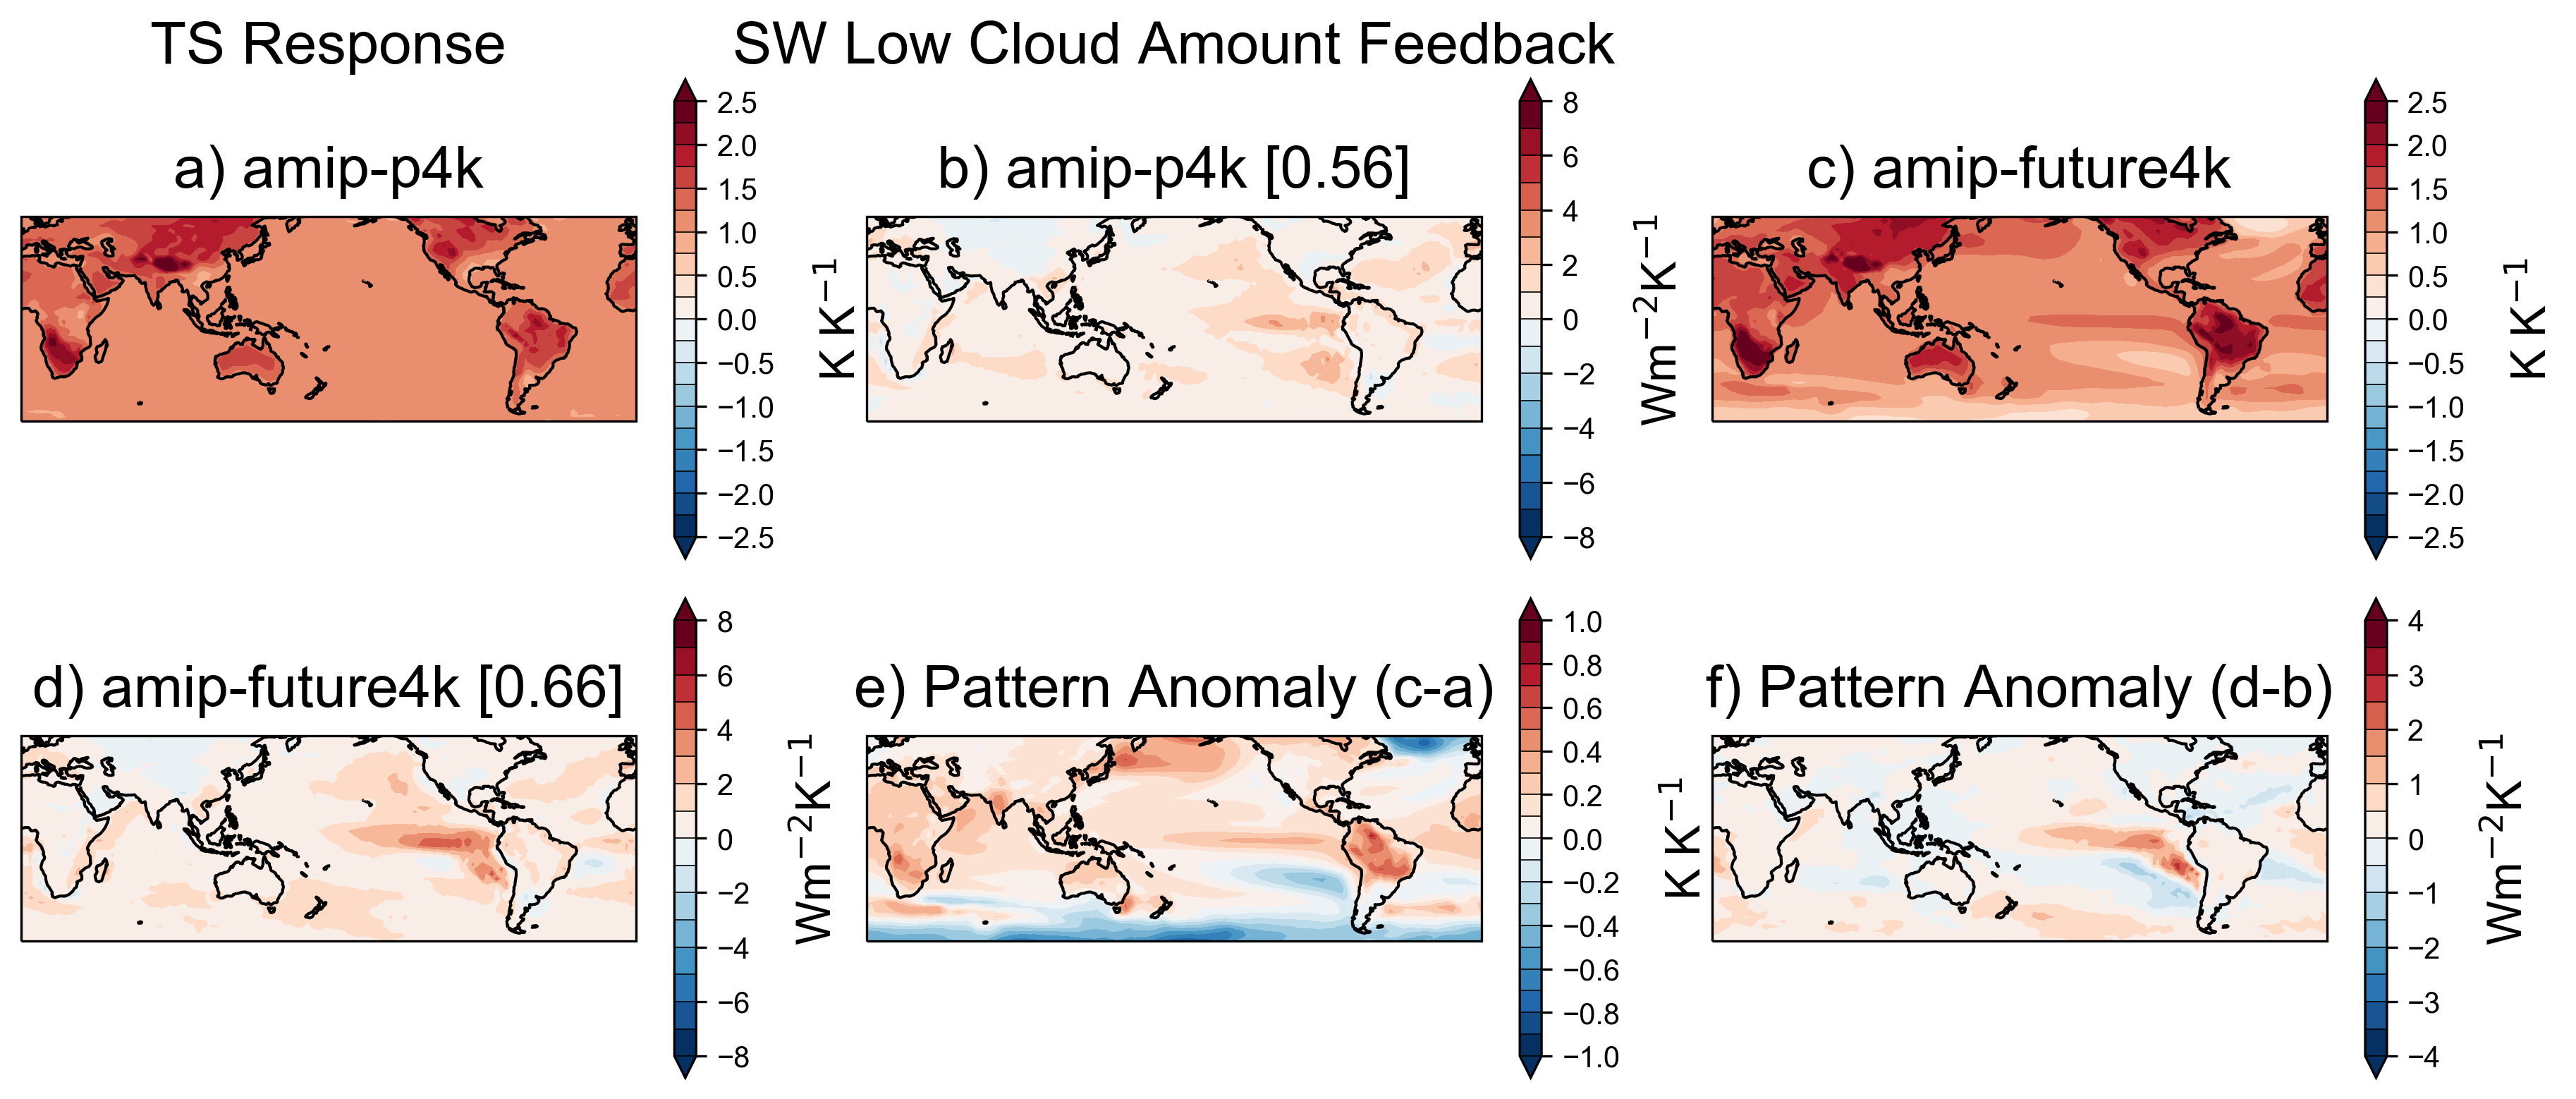

In [26]:
fig = plt.figure(figsize=(15,9),dpi=300)

#Uniform SST change
ax = plt.subplot(331,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([-100, 30, -60, 60], crs=ccrs.PlateCarree())
ax.set_title('TS Response\n\na) amip-p4k',fontsize=20,pad=10)
im = ax.contourf(lon_cyc,lat,SST_plot['CanESM5_p2']['Uniform']/3.95,\
                   SST_bounds,cmap=cmap,norm=SST_norm,extend='both')
ax.coastlines()
cbar_1 = plt.colorbar(im,ticks=SST_bounds_ticks,drawedges=True,shrink=1.2)
cbar_1.set_label('K K$^{-1}$',labelpad=15,fontsize=16)
#plt.text(0.15,1.3,'2SST',fontsize=20,transform = ax.transAxes)

#Uniform SW Cloud amount feedback
ax1 = plt.subplot(332,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([-100, 30, -60, 60], crs=ccrs.PlateCarree())
ax1.set_title('SW Low Cloud Amount Feedback\n\nb) amip-p4k [{}]'.\
              format(round(data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Low'],2)),fontsize=20,pad=10)
im1 = ax1.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Amount']['Uniform']['Low'],\
                   FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax1.coastlines()
cbar_1 = plt.colorbar(im1,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_1.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)
#plt.text(0.2,1.3,'5SST',fontsize=40,transform = ax1.transAxes)

#Pattern SST change
ax2 = plt.subplot(333,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([-100, 30, -60, 60], crs=ccrs.PlateCarree())
ax2.set_title('c) amip-future4k',fontsize=20,pad=10)
im2 = ax2.contourf(lon_cyc,lat,SST_plot['CanESM5_p2']['Pattern']/3.95,\
                   SST_bounds,cmap=cmap,norm=SST_norm,extend='both')
ax2.coastlines()
cbar_2 = plt.colorbar(im2,ticks=SST_bounds_ticks,drawedges=True,shrink=1.2)
cbar_2.set_label('K K$^{-1}$',labelpad=15,fontsize=16)
#plt.text(0.15,1.3,'2SST',fontsize=20,transform = ax.transAxes)

#Pattern SW Cloud amount feedback
ax3 = plt.subplot(334,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_extent([-100, 30, -60, 60], crs=ccrs.PlateCarree())
ax3.set_title('d) amip-future4k [{}]'.\
              format(round(data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Low'],2)),fontsize=20,pad=10)
im3 = ax3.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Amount']['Pattern']['Low'],\
                   FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax3.coastlines()
cbar_3 = plt.colorbar(im3,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_3.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)  

#Pattern SST change
ax4 = plt.subplot(335,projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_extent([-100, 30, -60, 60], crs=ccrs.PlateCarree())
ax4.set_title('e) Pattern Anomaly (c-a)',fontsize=20,pad=10)
im4 = ax4.contourf(lon_cyc,lat,\
    (SST_plot['CanESM5_p2']['Pattern']/3.95)-SST_plot['CanESM5_p2']['Uniform']/3.95,\
                   dSST_bounds,cmap=cmap,norm=dSST_norm,extend='both')
ax4.coastlines()
cbar_4 = plt.colorbar(im4,ticks=dSST_bounds_ticks,drawedges=True,shrink=1.2)
cbar_4.set_label('K K$^{-1}$',labelpad=15,fontsize=16)

#Pattern SW Cloud amount feedback
ax5 = plt.subplot(336,projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_extent([-100, 30, -60, 60], crs=ccrs.PlateCarree())
ax5.set_title('f) Pattern Anomaly (d-b)',fontsize=20,pad=10)
im5 = ax5.contourf(lon_cyc,lat,(data_sw_plot['CanESM5_p2']['Amount']['Pattern']['Low']-\
                   data_sw_plot['CanESM5_p2']['Amount']['Uniform']['Low']),\
                   dFB_bounds,cmap=cmap,norm=dFB_norm,extend='both')
ax5.coastlines()
#g = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', linestyle='-')
#g.xlabels_top = False
#g.xlabels_bottom = False
#g.ylabels_left = False
#g.ylabels_right = False
#g.xlines = False
#g.ylocator = mticker.FixedLocator([-30, 30])
cbar_5 = plt.colorbar(im5,ticks=dFB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_5.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16) 


plt.subplots_adjust(wspace=0.1,hspace=0.3)

#plt.savefig('CLD_Custom_5SST_CLDfb.png',bbox_inches='tight')

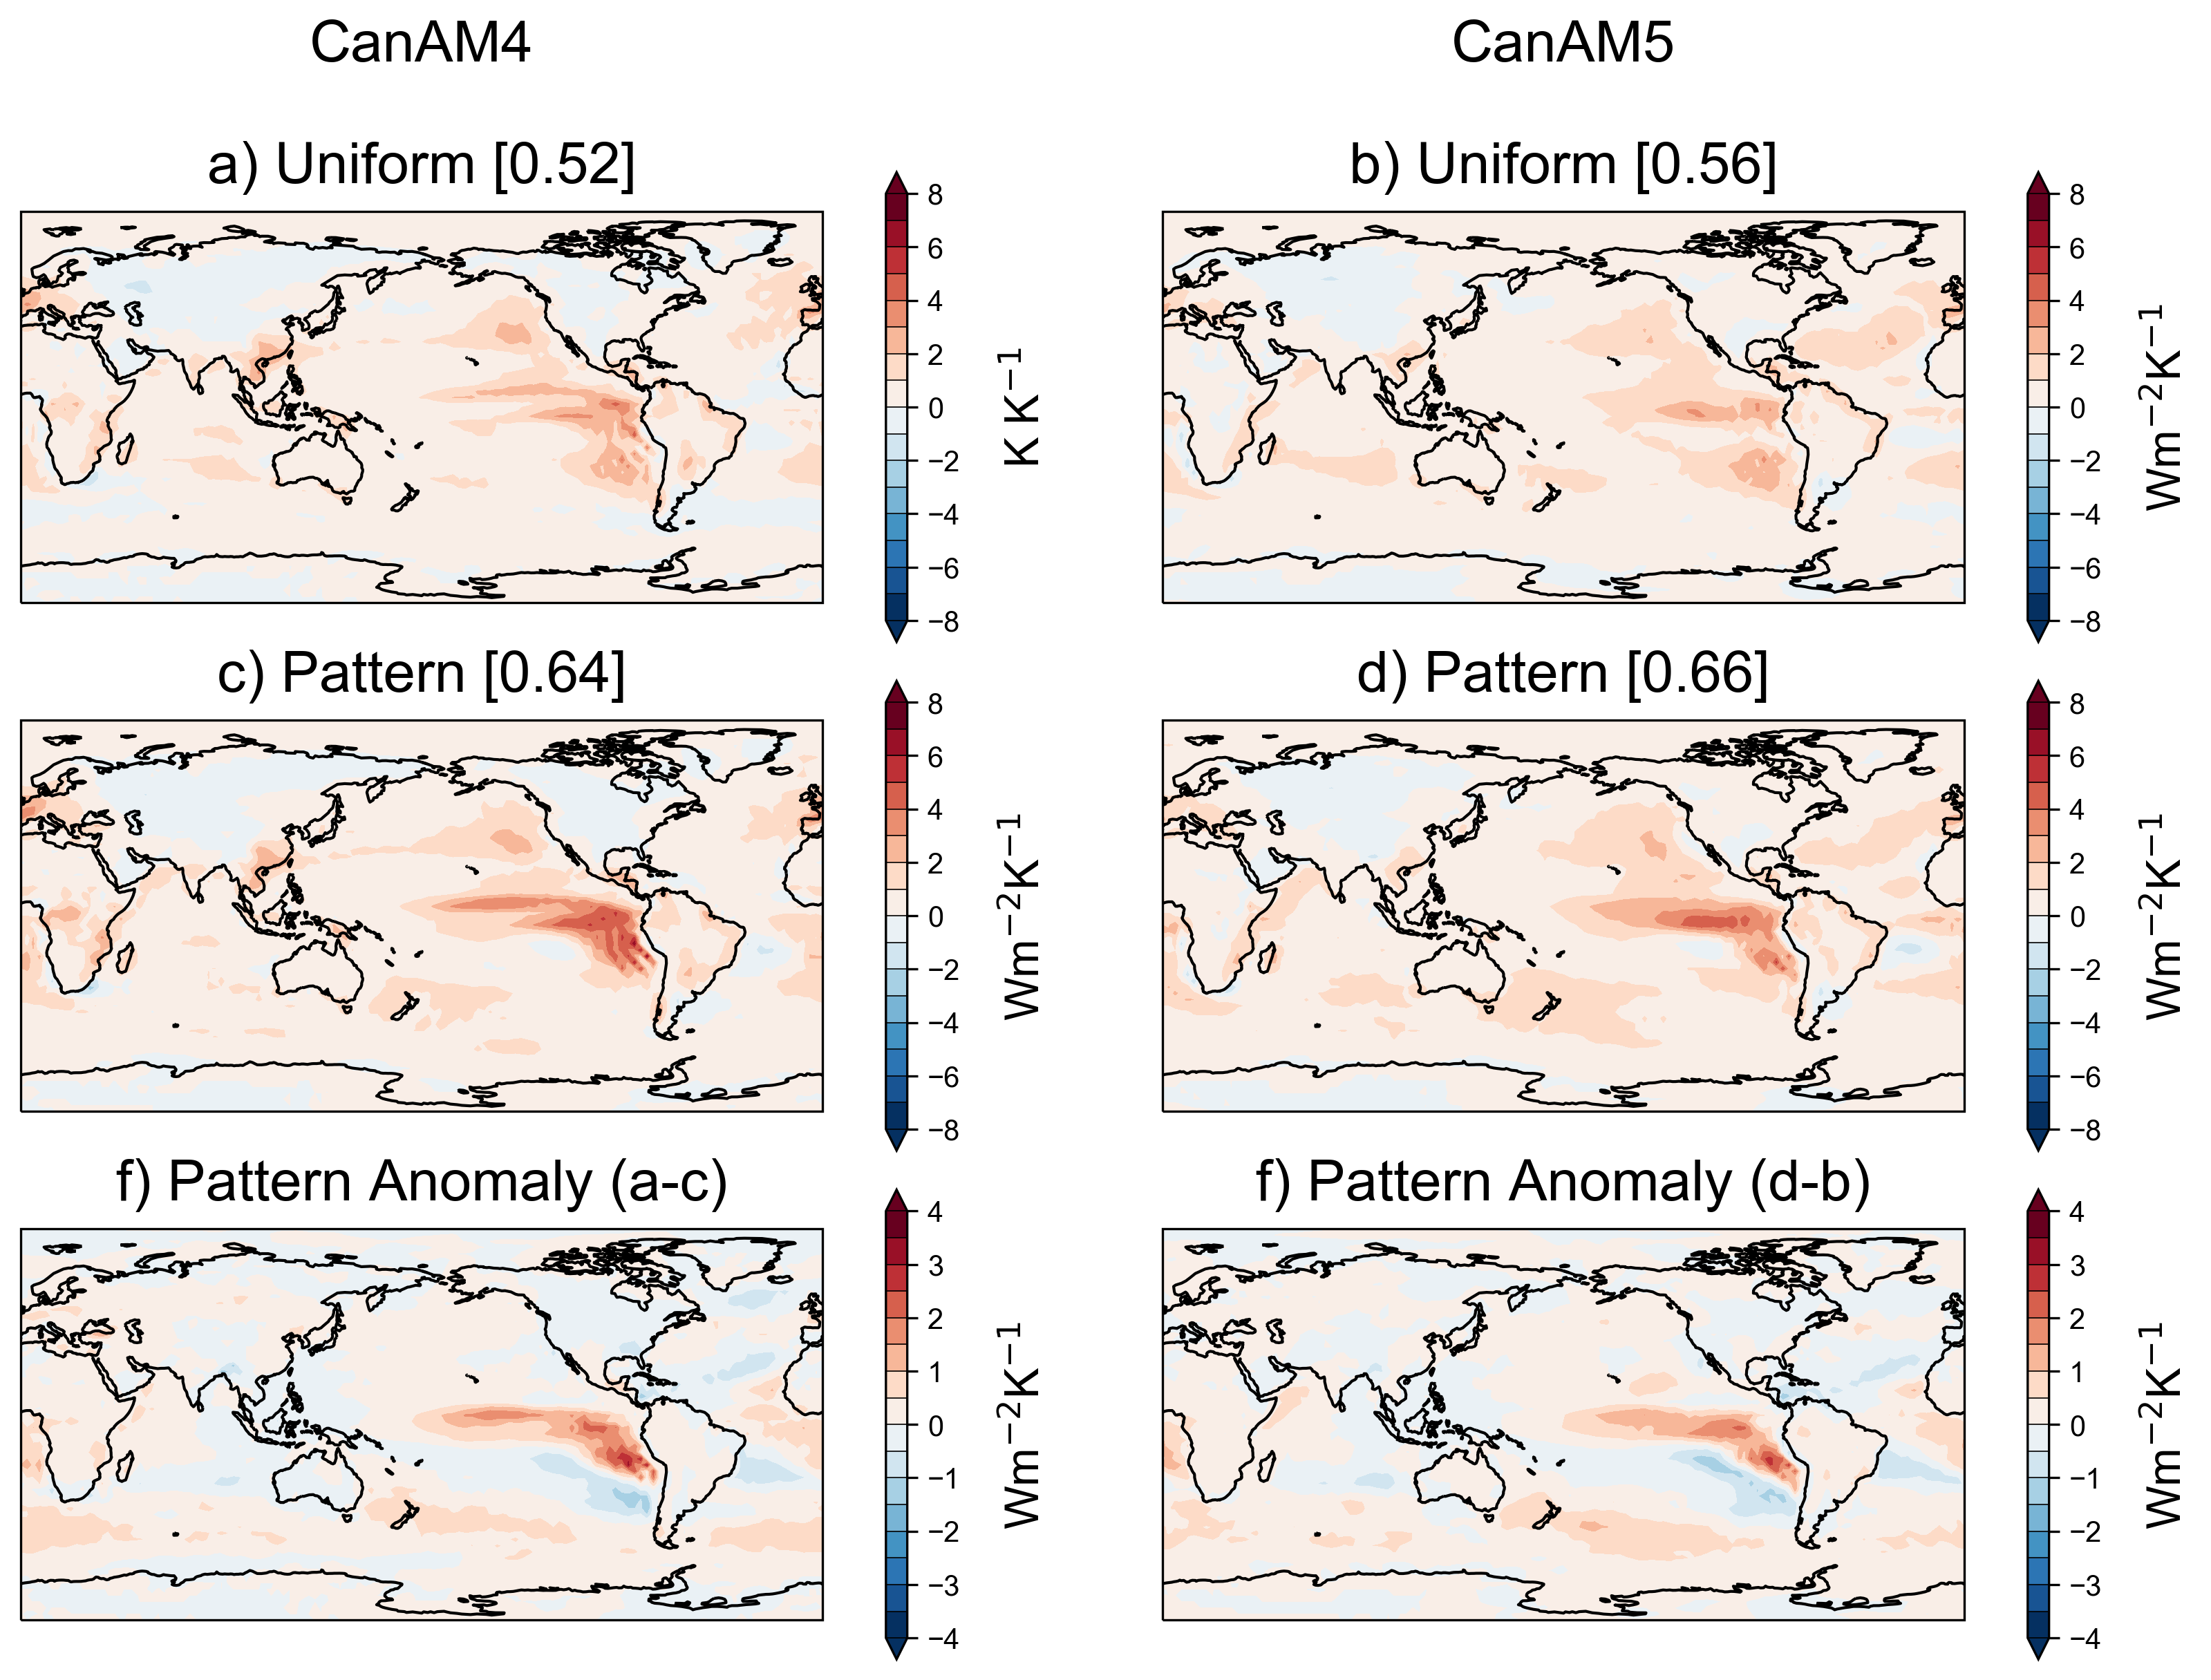

In [93]:
fig = plt.figure(figsize=(15,9),dpi=300)

#Uniform SST change
ax = plt.subplot(321,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('CanAM4\n\na) Uniform [{}]'.\
              format(round(data_sw_gam['CanESM2']['Uniform']['Low'],2)),fontsize=20,pad=10)
im = ax.contourf(lon_cyc,lat,data_sw_plot['CanESM2']['Uniform']['Low'],\
                   FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax.coastlines()
cbar_1 = plt.colorbar(im,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_1.set_label('K K$^{-1}$',labelpad=15,fontsize=16)
#plt.text(0.15,1.3,'2SST',fontsize=20,transform = ax.transAxes)

#Uniform SW Cloud amount feedback
ax1 = plt.subplot(322,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('CanAM5\n\nb) Uniform [{}]'.\
              format(round(data_sw_gam['CanESM5_p2']['Uniform']['Low'],2)),fontsize=20,pad=10)
im1 = ax1.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Uniform']['Low'],\
                   FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax1.coastlines()
cbar_1 = plt.colorbar(im1,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_1.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)
#plt.text(0.2,1.3,'5SST',fontsize=40,transform = ax1.transAxes)

ax2 = plt.subplot(323,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('c) Pattern [{}]'.\
              format(round(data_sw_gam['CanESM2']['Pattern']['Low'],2)),fontsize=20,pad=10)
im2 = ax2.contourf(lon_cyc,lat,data_sw_plot['CanESM2']['Pattern']['Low'],\
                   FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax2.coastlines()
cbar_2 = plt.colorbar(im2,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_2.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16) 

#Pattern SW Cloud amount feedback
ax3 = plt.subplot(324,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_title('d) Pattern [{}]'.\
              format(round(data_sw_gam['CanESM5_p2']['Pattern']['Low'],2)),fontsize=20,pad=10)
im3 = ax3.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Pattern']['Low'],\
                   FB_bounds,cmap=cmap,norm=FB_norm,extend='both')
ax3.coastlines()
cbar_3 = plt.colorbar(im3,ticks=FB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_3.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)  

#Pattern SST change
ax4 = plt.subplot(325,projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_title('f) Pattern Anomaly (a-c)',fontsize=20,pad=10)
im4 = ax4.contourf(lon_cyc,lat,(data_sw_plot['CanESM2']['Pattern']['Low']-\
                   data_sw_plot['CanESM2']['Uniform']['Low']),\
                   dFB_bounds,cmap=cmap,norm=dFB_norm,extend='both')
ax4.coastlines()
cbar_4 = plt.colorbar(im4,ticks=dFB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_4.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16) 

#Pattern SW Cloud amount feedback
ax5 = plt.subplot(326,projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_title('f) Pattern Anomaly (d-b)',fontsize=20,pad=10)
im5 = ax5.contourf(lon_cyc,lat,(data_sw_plot['CanESM5_p2']['Pattern']['Low']-\
                   data_sw_plot['CanESM5_p2']['Uniform']['Low']),\
                   dFB_bounds,cmap=cmap,norm=dFB_norm,extend='both')
ax5.coastlines()
cbar_5 = plt.colorbar(im5,ticks=dFB_bounds_ticks,drawedges=True,shrink=1.2)
cbar_5.set_label('Wm$^{-2}$K$^{-1}$',labelpad=15,fontsize=16)


plt.subplots_adjust(wspace=-0.1,hspace=0.3)

plt.savefig('CLD_CFMIP_Pattern_CLDLowAmt.eps',bbox_inches='tight')